### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading training data
df = pd.read_csv('data/train.csv')
dftest = pd.read_csv('data/test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### There are 12 columns and 891 rows. 5 features are int type, 5 features are of object type and remaining 2 are of float type. 

## Note: Age attribute is float type which is not correct data type for age. So we have to change it to int type.

In [6]:
# Changing data type of age from float to int
#df['Age'].astype('int')
# We cannot change Age attribute to int as it contains NA values.

In [7]:
# Statistics about data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
### Checking for null values of training data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### As we can see that three features have null values. Cabin has highest null values i.e 687, while Embarked has only two null values.Similarly, Age has 177 null values.

In [9]:
# Checking null values of testing data
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### There are three features having missing values.Cabin has the highest number of missing values while Fare has lowest number of missing values.

# Checking duplicated rows in datasets

In [10]:
# Checking duplicated rows of training data
df.duplicated().sum()

0

In [11]:
#Checking duplicated rows of testing data
dftest.duplicated().sum()

0

## Data Cleaning

#### Replacing the missing values of Age

In [12]:
# Replace missing values of training data with the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [13]:
df['Age'].isnull().sum()

0

In [14]:
## Replace missing values of test data with the mean of the column
dftest['Age'].fillna(dftest['Age'].mean(), inplace= True)

In [15]:
dftest['Age'].isnull().sum()

0

#### Replacing Cabin data

In [16]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [17]:
df['Cabin'].mode()[0]

'B96 B98'

In [18]:
# Forward fill missing values of Cabin features of training data
df['Cabin'].fillna(method='ffill', inplace=True)

In [19]:
df['Cabin'].value_counts()

Cabin
G6             24
B78            21
C78            20
C23 C25 C27    19
C83            19
               ..
C90             1
C101            1
C62 C64         1
F G63           1
E10             1
Name: count, Length: 147, dtype: int64

In [20]:
# Forward fill missing values of Cabin features of test data
dftest['Cabin'].fillna(method='ffill', inplace=True)

In [21]:
dftest['Cabin'].value_counts()

Cabin
C89        33
C55 C57    14
C39        12
F33        12
A34        12
           ..
E39 E41     1
E60         1
C53         1
D43         1
F E57       1
Name: count, Length: 76, dtype: int64

In [22]:
### Removing rows of missing column whose quantity is less than 5.
# Remove rows with missing values in a Embarked of training data
df.dropna(subset=['Embarked'], inplace=True)

In [23]:
# Remove rows with missing values in a Fare of test data
dftest.dropna(subset=['Fare'], inplace=True)

### Again checking for null values of train and test data

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [25]:
# Forward fill missing values of Cabin features of training data
df['Cabin'].fillna(method='bfill', inplace=True)

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
# for training data

In [28]:
# Forward fill missing values of Cabin features of training data
dftest['Cabin'].fillna(method='bfill', inplace=True)

In [29]:
dftest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [30]:
dftest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## As we know age is float data type so we have to convert it into int

In [31]:
# Converting decimal age to ceiling 
df['Age'] = df['Age'].apply(np.ceil)
dftest['Age'] = dftest['Age'].apply(np.ceil)

In [32]:
df['Age'] = df['Age'].astype('int')
dftest['Age'] = dftest['Age'].astype('int')


In [33]:
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 889, dtype: int64

## Exploratory Data Analysis

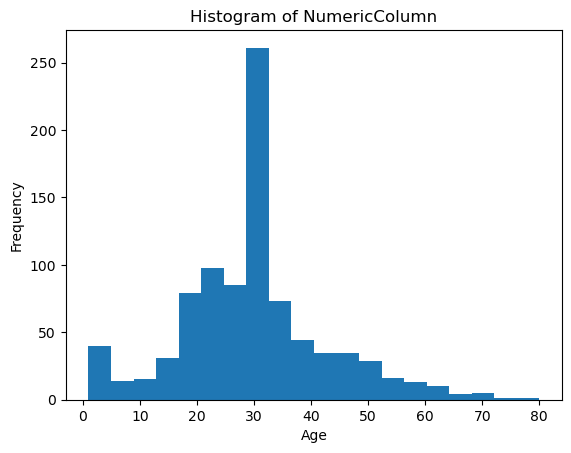

In [34]:
# Histogram of a numeric variable
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of NumericColumn')
plt.show()


#### Maximum age group is (30-35), majority age group (18-40), and minimum representation age group (65-80)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C123,S


In [36]:
df['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [37]:
df['SibSp'].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [38]:
df['Parch'].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [39]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

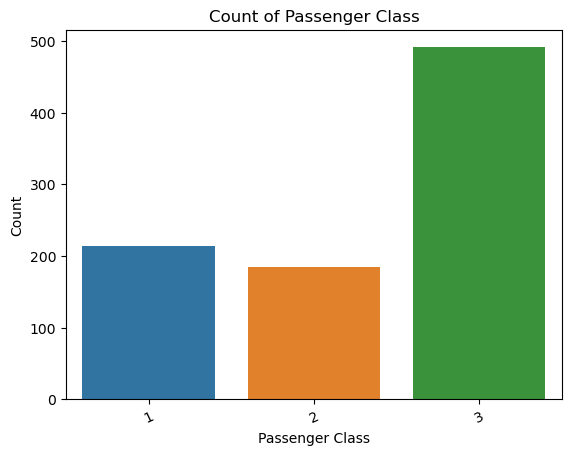

In [40]:
# Bar plot of a categorical variable
sns.countplot(data=df, x='Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count of Passenger Class')
plt.xticks(rotation=25)
plt.show()

#### Most of the passenger are from 3rd class

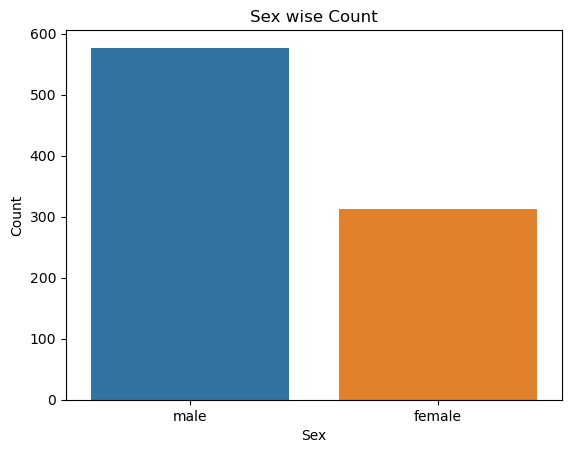

In [41]:
# Bar plot of a categorical variable
sns.countplot(data=df, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex wise Count')
plt.xticks(rotation=0)
plt.show()

### Male proportion is higher.

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C123,S


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C123,S


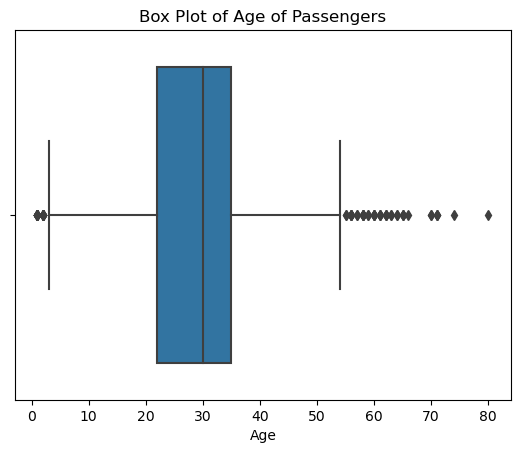

In [44]:
# Box plot to identify outliers
sns.boxplot(data=df, x='Age')
plt.xlabel('Age')
plt.title('Box Plot of Age of Passengers')
plt.show()

#### Most people are from 22 to 35 age group

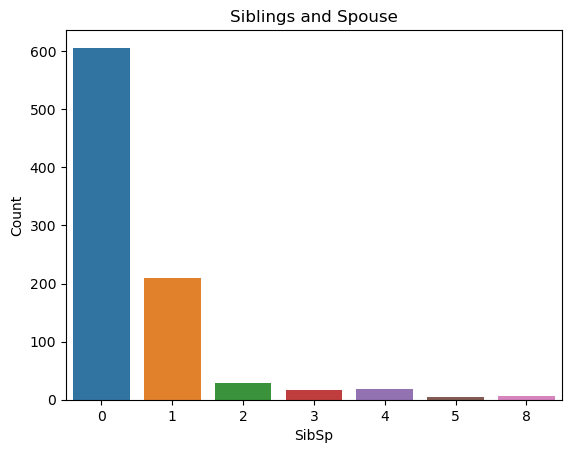

In [45]:
# Bar plot of a categorical variable
sns.countplot(data=df, x='SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Siblings and Spouse')
plt.xticks(rotation=0)
plt.show()

#### About 600 passengers are travelling single. Some passengers have upto eight family members.

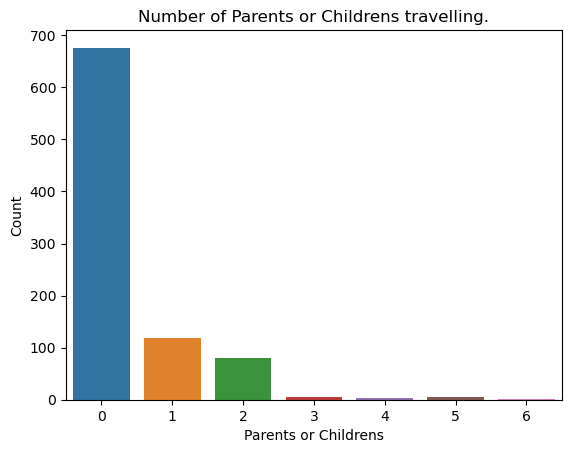

In [46]:
# Bar plot of a categorical variable
sns.countplot(data=df, x='Parch')
plt.xlabel('Parents or Childrens')
plt.ylabel('Count')
plt.title('Number of Parents or Childrens travelling.')
plt.xticks(rotation=0)
plt.show()

#### Most of them have no parents or children.

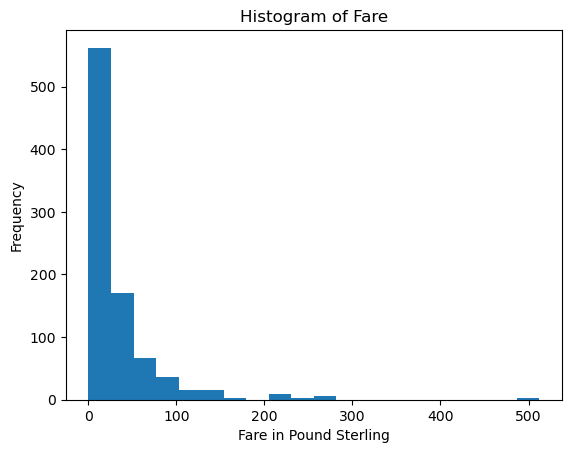

In [47]:
# Histogram of a numeric variable
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare in Pound Sterling')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()


#### Highest price was 500 pound.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

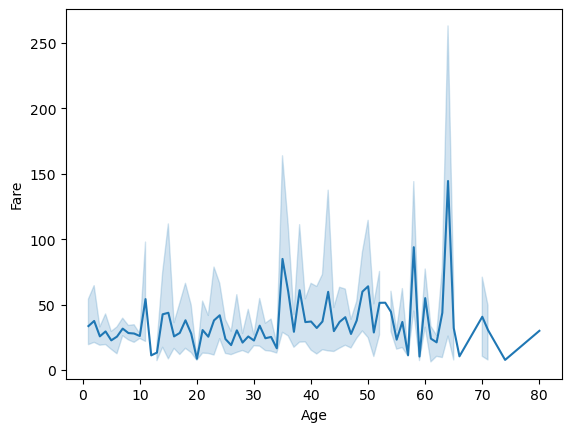

In [48]:
# Line plot of Age vs Fare
sns.lineplot(x='Age', y='Fare', data=df)

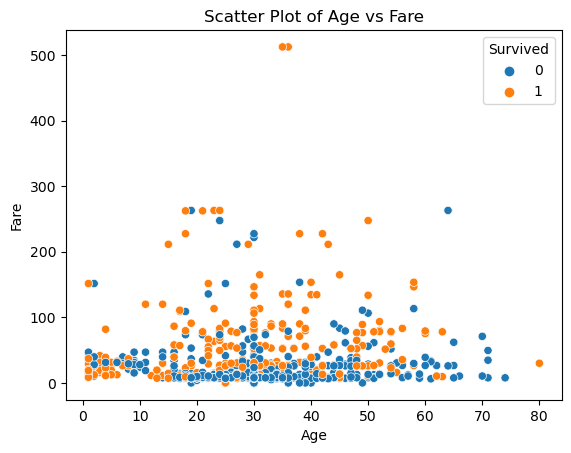

In [49]:
# Scatter plot between two numeric variables i.e Age and Fare
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

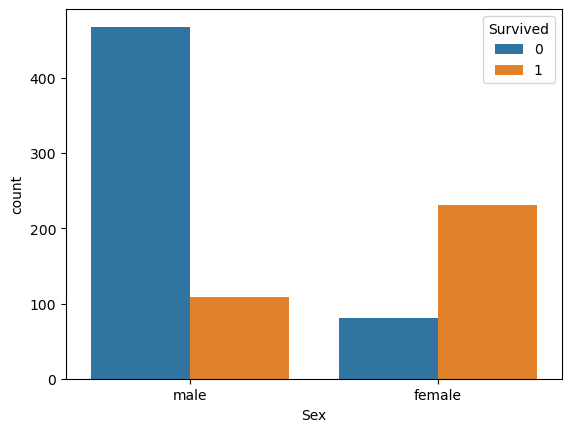

In [50]:
# barplot of sex and survived
sns.countplot(x='Sex',  hue='Survived', data=df)

#### Ratio of male death is very high compared to female.

In [51]:
# Correlations
# Calculate correlations between all numerical features
correlation_matrix = df.corr(numeric_only= True)
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.029959,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.075836,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.325915,0.081656,0.016824,-0.548193
Age,0.029959,-0.075836,-0.325915,1.000000,-0.231935,-0.179385,0.087334
SibSp,-0.057686,-0.034040,0.081656,-0.231935,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.179385,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.087334,0.160887,0.217532,1.000000


<AxesSubplot:>

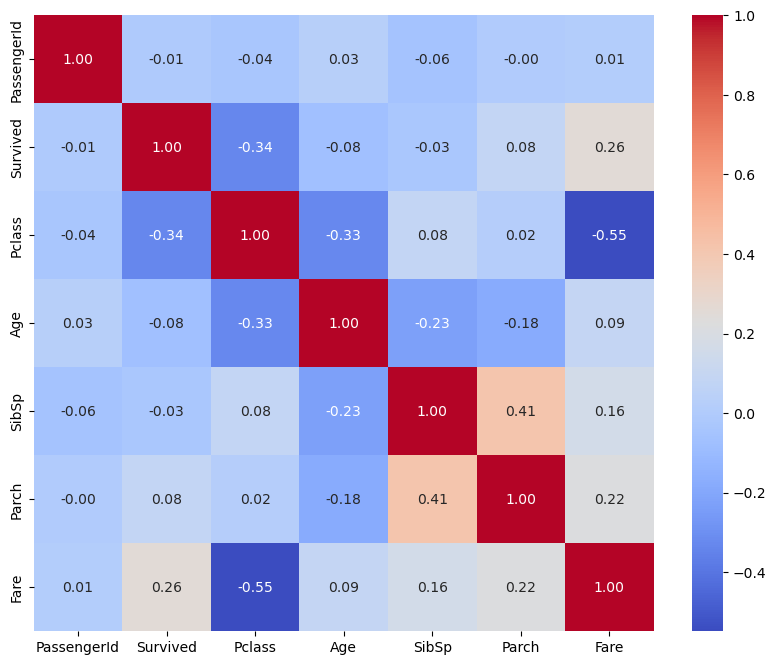

In [52]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt='.2f' )


#### As we can see, there are no highly correlated features.

In [53]:
# Removing unnecessay columns of training data
df2 = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
## Removing unnecessay columns of testing data
df2test = dftest.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [54]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,30,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


### Converting Categorical features


In [55]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [56]:
# Making instance of Label Encoder
le = LabelEncoder()

In [57]:
#Transforming and fitting of training data
df2['Embarked'] =le.fit_transform(df2['Embarked'])
df2['Sex'] =le.fit_transform(df2['Sex'])


In [58]:
df2


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,2
887,1,1,0,19,0,0,30.0000,2
888,0,3,0,30,1,2,23.4500,2
889,1,1,1,26,0,0,30.0000,0


In [59]:
X = df2.drop('Survived', axis=1)


In [60]:
y = df2['Survived'] 
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## Train Test Split


In [62]:
from sklearn.model_selection import train_test_split

# Assuming you have a feature matrix X and a target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scaling

In [64]:
# Importing libraries
from sklearn.preprocessing import StandardScaler

In [65]:
# Applying standard scaler
sc = StandardScaler()

In [66]:
#  Scaling the features of training and testing data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [67]:
X_train

array([[-1.58410418, -1.40530972, -0.60543138, ..., -0.4756437 ,
         2.43059683,  0.58770431],
       [ 0.8122747 , -1.40530972,  0.00461179, ..., -0.4756437 ,
        -0.35813533, -1.95246446],
       [ 0.8122747 ,  0.71158691,  0.15712258, ..., -0.4756437 ,
        -0.49094895,  0.58770431],
       ...,
       [-1.58410418, -1.40530972,  1.37720892, ..., -0.4756437 ,
        -0.12471679,  0.58770431],
       [ 0.8122747 , -1.40530972, -0.68168678, ...,  2.01099358,
         0.04708333,  0.58770431],
       [ 0.8122747 ,  0.71158691,  0.23337798, ..., -0.4756437 ,
        -0.47611594,  0.58770431]])

In [68]:
# Since the scaled data is in array. So, we have to convert it into panda dataframe.
X_train = pd.DataFrame(X_train, columns= ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'])
X_test = pd.DataFrame(X_test, columns= ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'])

In [69]:
X_train.describe().round(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,711.00,711.00,711.00,711.00,711.00,711.00,711.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.58,-1.41,-2.21,-0.47,-0.48,-0.65,-1.95
25%,-0.39,-1.41,-0.61,-0.47,-0.48,-0.49,-0.68
50%,0.81,0.71,0.00,-0.47,-0.48,-0.36,0.59
75%,0.81,0.71,0.46,0.38,-0.48,-0.03,0.59
max,0.81,0.71,3.82,6.38,6.98,9.77,0.59


## Model training

In [96]:
# Importing essential libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [71]:
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

(178,)

In [77]:
# Calculate Mean Squared Error (MSE) as a regression metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) as a regression metric
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 0.14387119693992712
R-squared (R2) score: 0.3939083893305877


### Logistic Regression

In [85]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train, y_train)


LogisticRegression()

In [87]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8089887640449438


In [89]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[94 15]
 [19 50]]


### Decision tree

In [91]:
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [93]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)


In [94]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7640449438202247


In [95]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[89 20]
 [22 47]]


### Support Vector Machine

In [98]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [99]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)


In [100]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.797752808988764


In [101]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[89 20]
 [16 53]]
